In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Ładowanie danych

In [2]:
labels=pd.read_csv("image_labels_test.csv")
labels

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other disease,No finding
0,e0dc2e79105ad93532484e956ef8a71a,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,0aed23e64ebdea798486056b4f174424,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,aa15cfcfca7605465ca0513902738b95,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,665c4a6d2693dc0286d65ab479c9b169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,42da2c134b53cb5594774d3d29faac59,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,a039af299f86007d0d77da077a6def9a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2996,aba3d1f5b1c04236f52a8980929b2cfa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2997,6d3d6b53f358a983b486e9e03144eb62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2998,d6678cb7ae39f575d35ab9da6d7cb171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
annotations=pd.read_csv("annotations_test.csv")
annotations

,image_id,class_name,x_min,y_min,x_max,y_max
0,e0dc2e79105ad93532484e956ef8a71a,Calcification,1221.560976,661.580417,1343.298780,783.318222
1,e0dc2e79105ad93532484e956ef8a71a,Cardiomegaly,638.695122,1310.848710,1800.737805,1937.982856
2,e0dc2e79105ad93532484e956ef8a71a,ILD,1693.756098,1392.007246,1929.853659,1941.671881
3,e0dc2e79105ad93532484e956ef8a71a,Pneumothorax,399.924053,145.803282,1016.600328,510.138208
4,e0dc2e79105ad93532484e956ef8a71a,Pneumothorax,334.300846,493.762382,453.145487,744.509170
...,...,...,...,...,...,...
4743,9e8a5a85012b7b8c5dd164382d93e089,No finding,NaN,NaN,NaN,NaN
4744,8b9ea72de468504f3dbc3fc711f905a3,No finding,NaN,NaN,NaN,NaN
4745,b6c2293402377da9dc28dc65609022f0,No finding,NaN,NaN,NaN,NaN
4746,84564d34f32254f20e49bcb6ab603421,No finding,NaN,NaN,NaN,NaN


In [25]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   image_id            3000 non-null   object
 1   Aortic enlargement  3000 non-null   int64 
 2   Atelectasis         3000 non-null   int64 
 3   Calcification       3000 non-null   int64 
 4   Cardiomegaly        3000 non-null   int64 
 5   Clavicle fracture   3000 non-null   int64 
 6   Consolidation       3000 non-null   int64 
 7   Edema               3000 non-null   int64 
 8   Emphysema           3000 non-null   int64 
 9   Enlarged PA         3000 non-null   int64 
 10  ILD                 3000 non-null   int64 
 11  Infiltration        3000 non-null   int64 
 12  Lung Opacity        3000 non-null   int64 
 13  Lung cavity         3000 non-null   int64 
 14  Lung cyst           3000 non-null   int64 
 15  Mediastinal shift   3000 non-null   int64 
 16  Nodule/Mass         3000

In [28]:
annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_id    4748 non-null   object 
 1   class_name  4748 non-null   object 
 2   x_min       2697 non-null   float64
 3   y_min       2697 non-null   float64
 4   x_max       2697 non-null   float64
 5   y_max       2697 non-null   float64
dtypes: float64(4), object(2)
memory usage: 222.7+ KB


#### W pliku z etykietami nie ma pustych okienek. Natomiast plik z annotacjami zawiera wiersze, w których nie ma wartości, co nie jest raczej oczekiwane ponieważ puste wiersze dotyczą zdjęć, w których nie wykryto żadnych schorzeń.

# EDA

## Procent pacjentów zdrowych

In [4]:
len(labels[labels["No finding"]==1])/len(labels)

0.6836666666666666

#### W bazie 68.37% pacjentów jest zdrowych

## Ilość schorzeń u jednego pacjenta

In [30]:
d_count=labels.sum(axis=1)[labels["No finding"]==0]
print(f'min: {min(d_count)}')
print(f'max: {max(d_count)}')

min: 2
max: 11


#### Każdy pacjent u którego stwierdzono schorzenie cierpi na conajmnieJ 2 choroby i co najwyżej na 11 chorób.

### Histogram

(array([284., 298., 182., 101.,  47.,  23.,   9.,   4.,   0.,   1.]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

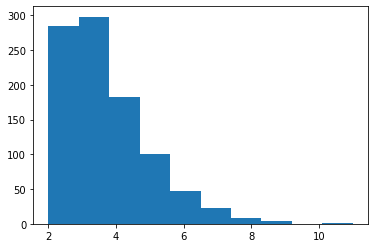

In [7]:
plt.hist(d_count)

In [32]:
round(np.sum(d_count>=5)/len(d_count)*100,2)

19.49

#### Najczęściej są to jednak trzy choroby i aż 19.49% osób chorych cierpi na conajmniej 5 schorzeń

## Analiza dla poszczególnych chorób

In [9]:
data=labels.drop(["image_id","No finding"],axis="columns")[labels["No finding"]==0]

### Inforamcja wzajemna

In [10]:
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings("ignore")
def custom_mi_reg(a, b):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    return  mutual_info_regression(a, b)[0] # should return a float value
    
    
data_corr = data.corr(method=custom_mi_reg)

In [11]:
sort=data_corr.unstack().sort_values(ascending=False)
sort[sort<1][::2].head()

Nodule/Mass    Lung tumor            0.164279
Pneumonia      Consolidation         0.146235
Tuberculosis   Pulmonary fibrosis    0.110335
Consolidation  Other disease         0.093590
Lung tumor     Other disease         0.081723
dtype: float64

#### Największa informacja zależna jest pomiędzy Nodule/Mass (Guz) i Lung tumor (Rak płuc). 

## Najczęstsze choroby w zbiorze danych (histogram)

<AxesSubplot:>

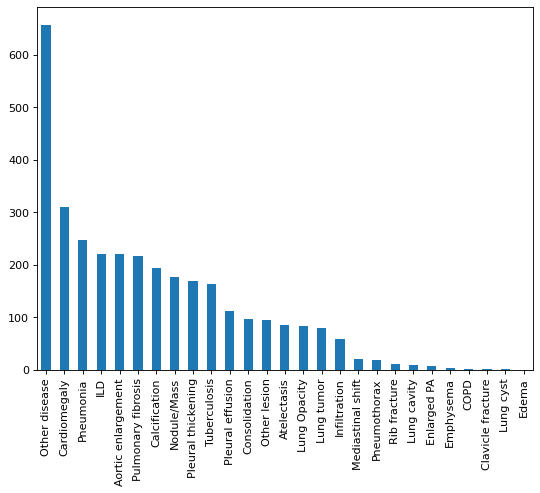

In [12]:
plt.figure(figsize=(8, 6), dpi=80)
data.sum(axis=0).sort_values(ascending=False).plot(kind="bar")


In [33]:
round(data["Other disease"].sum(axis=0)/len(data)*100,2)

69.23

In [34]:
round(data["Cardiomegaly"].sum(axis=0)/len(data)*100,2)

32.56

In [35]:
round(data["Pneumonia"].sum(axis=0)/len(data)*100,2)

25.92

#### Aż u 69.23% pacjentów chorych stwierdzono schorzenia inne. 32.56% cierpi na Cardiomegaly (Kardiomegalia) i 25.92% na Pneumonia (Zapalenie płuc).

# EDA Prześwietleń

In [14]:
import PIL
Image=PIL.Image

In [15]:
data.sum(axis=0).sort_values(ascending=False)


Other disease         657
Cardiomegaly          309
Pneumonia             246
ILD                   221
Aortic enlargement    220
Pulmonary fibrosis    217
Calcification         194
Nodule/Mass           176
Pleural thickening    169
Tuberculosis          164
Pleural effusion      111
Consolidation          96
Other lesion           94
Atelectasis            86
Lung Opacity           84
Lung tumor             80
Infiltration           58
Mediastinal shift      20
Pneumothorax           18
Rib fracture           11
Lung cavity             9
Enlarged PA             8
Emphysema               3
COPD                    2
Clavicle fracture       2
Lung cyst               2
Edema                   0
dtype: int64

In [16]:
annotations["class_name"].value_counts()

No finding            2051
Pulmonary fibrosis     358
ILD                    316
Cardiomegaly           310
Nodule/Mass            286
Pleural thickening     240
Calcification          232
Aortic enlargement     221
Pleural effusion       136
Consolidation          126
Other lesion           112
Atelectasis             96
Lung Opacity            95
Infiltration            79
Pneumothorax            25
Mediastinal shift       20
Rib fracture            17
Lung cavity             10
Enlarged PA              9
Emphysema                4
Lung cyst                3
Clavicle fracture        2
Name: class_name, dtype: int64

#### Co ciekawe zbiór annotacji nie opisuje wszystkich chorób takich jak COPD (Przewlekła obturacyjna choroba płuc) i Pneumonia (Zapalenie płuc).

In [17]:
from PIL import Image, ImageDraw
#funkcja rysuje pierwsze 4 prześwietlenia pacjentów z podaną chorobą z zaznaczonym obszarem wskazującym objawy
def inspect(disease):
    for i in annotations[annotations["class_name"]==disease].index[0:4]:
        row=annotations.iloc[i,]
        image=Image.open("./Input/"+row[0]+".jpg")

        draw = ImageDraw.Draw(image)
        draw.rectangle([(row[4],row[5]),(row[2],row[3])],outline="white",width=6)
        width=image.size[0]
        height=image.size[1]
        display(image.resize((width//6,  height//6), Image.NEAREST))

## Cardiomegaly (Kardiomegalia)

#### Objawem tej choroby jest powiększenie się serca.

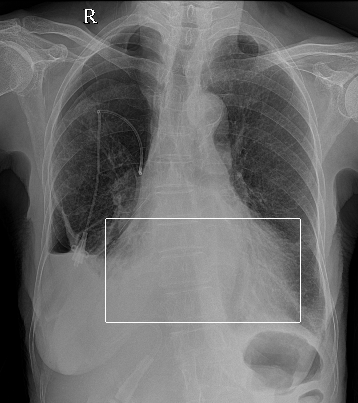

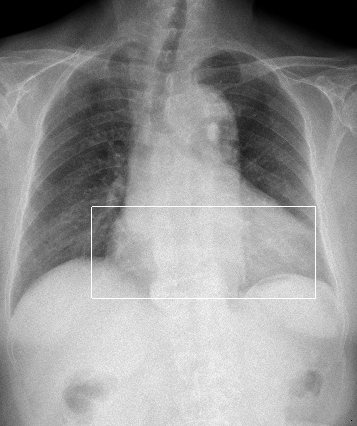

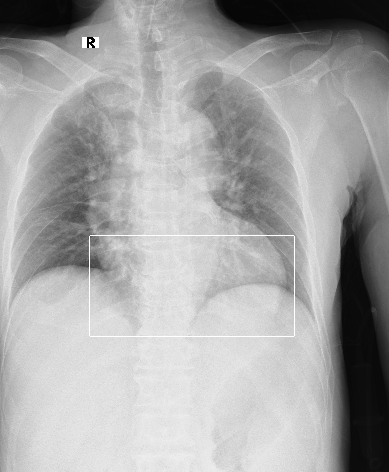

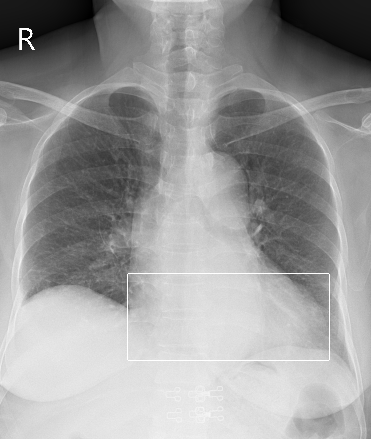

In [18]:
inspect("Cardiomegaly")

## ILD (Choroby śródmiąższowe płuc)

#### Charakteryzują się one występowaniem rozsianych zmian w obrazie radiologicznym klatki piersiowej.

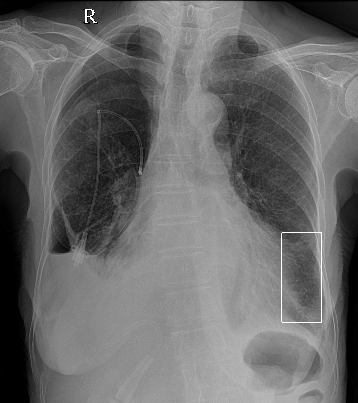

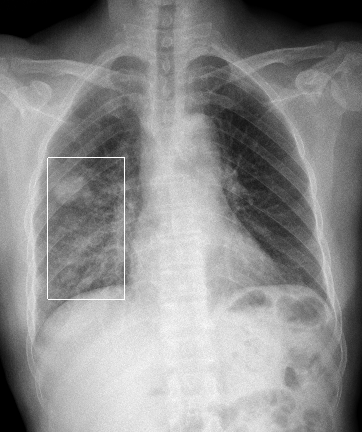

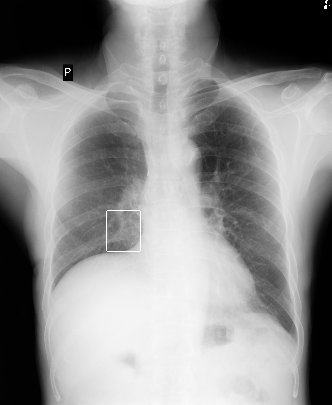

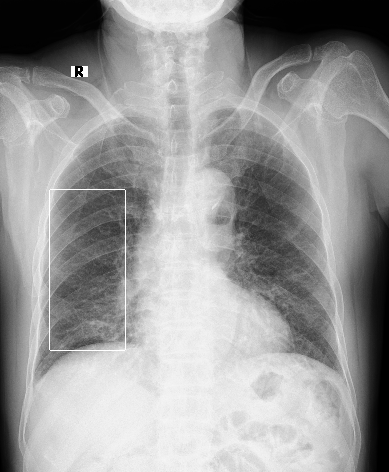

In [19]:
inspect("ILD")

#### Objawy wydają się charakteryzować zwiększoną ilością wydzieliny w płucach.

## Aortic enlargement (Tętniak aorty)

#### Rozszerzenie się aorty o ponad 50% w stosunku do jej prawidłowej średnicy.

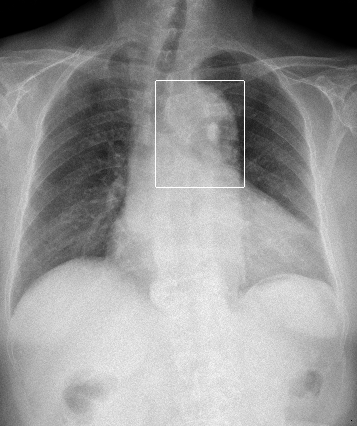

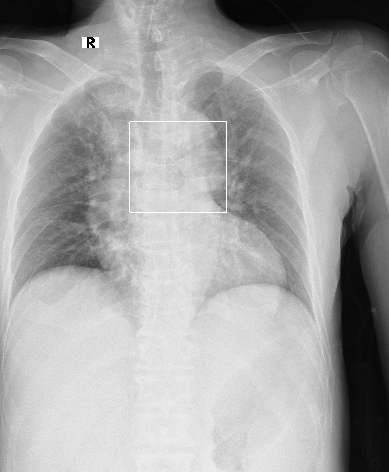

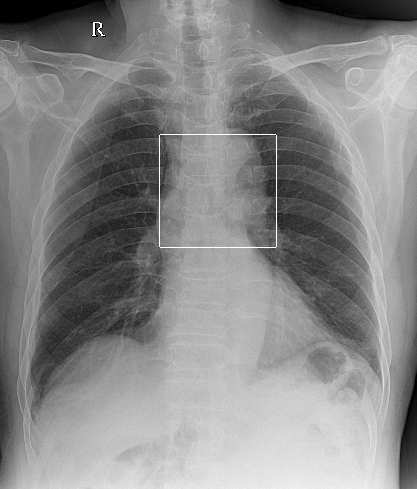

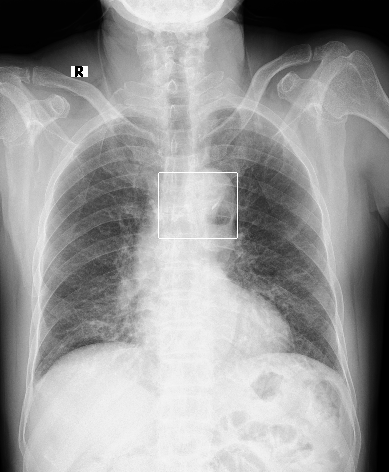

In [20]:
inspect("Aortic enlargement")

## Rib fracture (Połamane żebra)

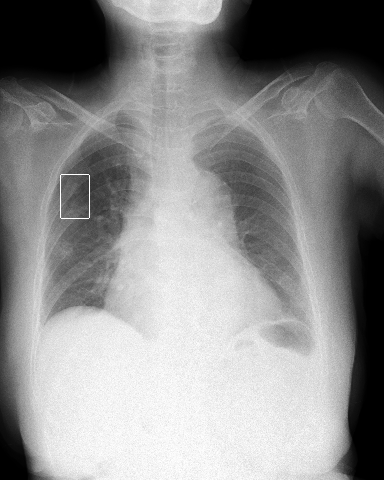

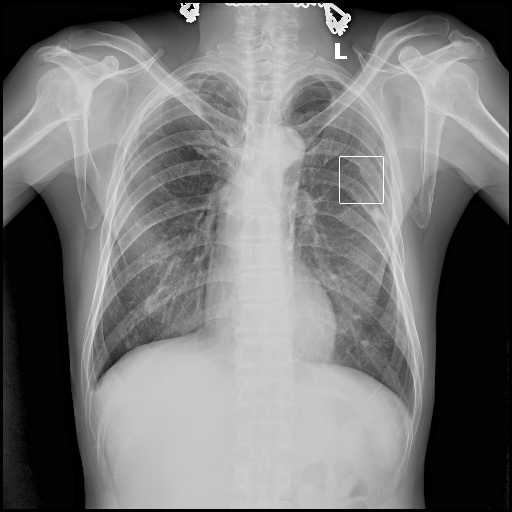

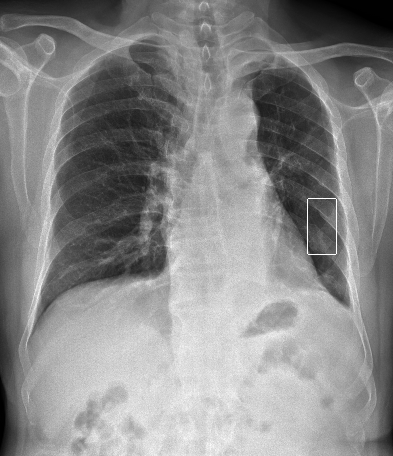

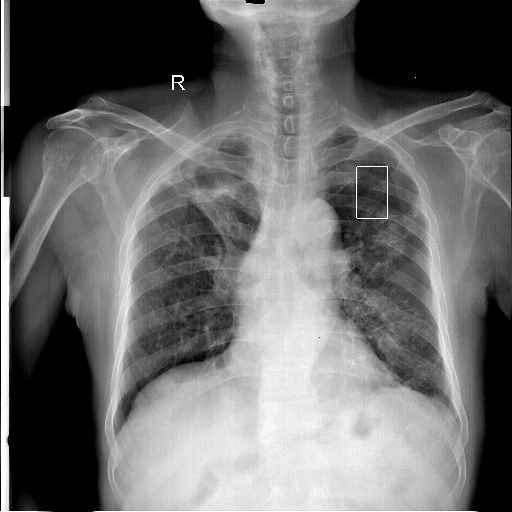

In [36]:
inspect("Rib fracture")

#### Osobiście nie widzę żadnego złamania.

## Emphysema (Rozedma płuc)

#### Choroba ta charakteryzuje się nieprawidłowym powiększeniem przestrzeni powietrznych położonych obwodowo od oskrzelików końcowych i destrukcją ścianek tych struktur. Skutkiem tego jest nadmierne upowietrznienie płuc, przy zmniejszeniu ilości pęcherzyków płucnych.

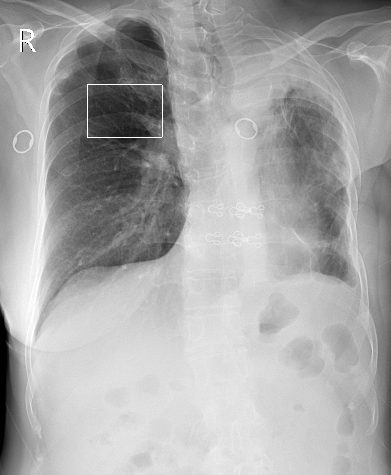

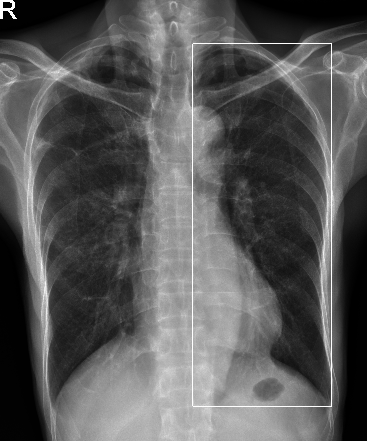

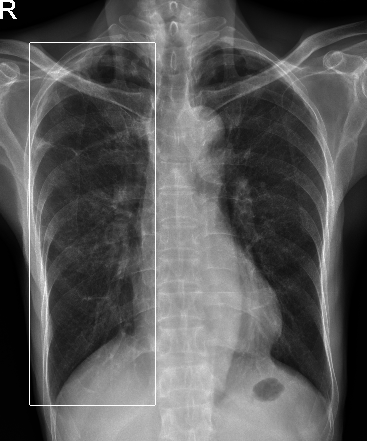

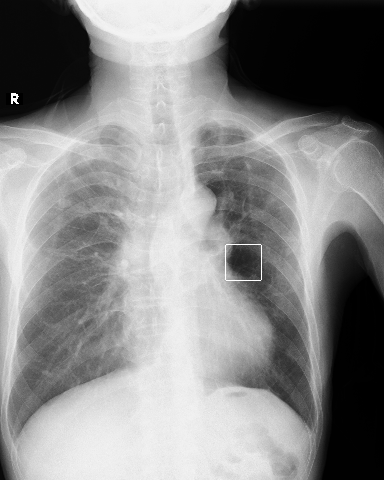

In [22]:
inspect("Emphysema")

#### Głównym objawem wydają się być ciemne obszary na prześwietleniu.

## Calcification (Zwapnienie)

#### Objawem schorzenia jest odkładanie się soli wapnia w tkankach miękkich organizmu.

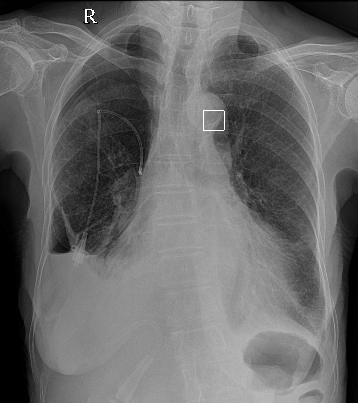

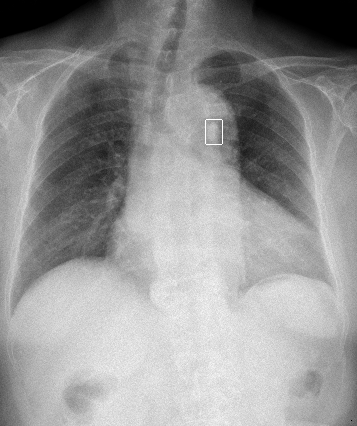

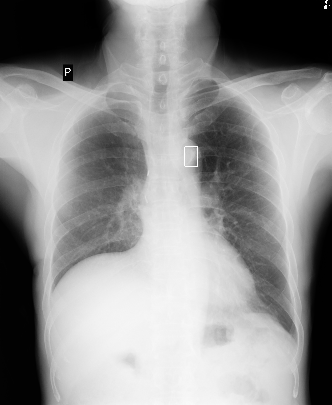

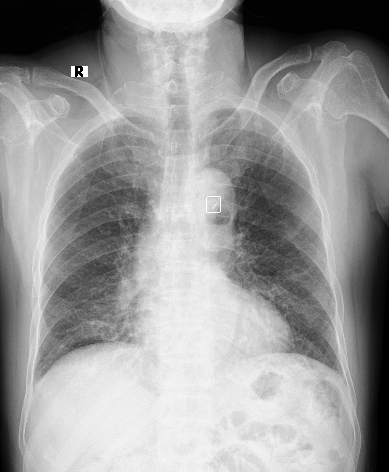

In [38]:
inspect("Calcification")

#### Na kości widać jaśniejszy punkcik.